# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

# Read Data

In [2]:
data = pd.read_csv('../01-Data/2004-2019.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])

In [3]:
data.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


# Translate column names to English

In [4]:
data.columns

Index(['Unnamed: 0', 'DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO',
       'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
       'ANO'],
      dtype='object')

In [5]:
data.columns = [
                    "Unnamed:_0", 
                    "Analysis_Date", #DATA INICIAL
                    "Last_Day_of_Analyses_of_Week", #DATA FINAL
                    "Macroregion", #REGIÃO
                    "State", #ESTADO
                    "Product", #PRODUTO
                    "No_of_Gas_Stations_Analyzed", #NÚMERO DE POSTOS PESQUISADOS
                    "Measurement_Unit", #UNIDADE DE MEDIDA
                    "Mean_Price", #PREÇO MÉDIO REVENDA
                    "Std_Dev", #MARGEM MÉDIA REVENDA
                    "Min_Price", #DESVIO PADRÃO REVENDA
                    "Max_Price", #PREÇO MÁXIMO REVENDA
                    "Mean_Price_Margin", #MARGEM MÉDIA REVENDA
                    "Coefficient_of_variation", #COEF DE VARIAÇÃO REVENDA
                    "Mean_Dist_Price", #PREÇO MÉDIO DISTRIBUIÇÃO
                    "Distribution_Std_Dev", #DESVIO PADRÃO DISTRIBUIÇÃO
                    "Distribution_Min_Price", #PREÇO MÍNIMO DISTRIBUIÇÃO
                    "Distribution_Max_Price", #PREÇO MÁXIMO DISTRIBUIÇÃO
                    "Distribution_Coefficient_of_Variation", #COEF DE VARIAÇÃO DISTRIBUIÇÃO
                    "Month", #MÊS
                    "Year" #ANO
]

In [6]:
data.columns

Index(['Unnamed:_0', 'Analysis_Date', 'Last_Day_of_Analyses_of_Week',
       'Macroregion', 'State', 'Product', 'No_of_Gas_Stations_Analyzed',
       'Measurement_Unit', 'Mean_Price', 'Std_Dev', 'Min_Price', 'Max_Price',
       'Mean_Price_Margin', 'Coefficient_of_variation', 'Mean_Dist_Price',
       'Distribution_Std_Dev', 'Distribution_Min_Price',
       'Distribution_Max_Price', 'Distribution_Coefficient_of_Variation',
       'Month', 'Year'],
      dtype='object')

# Target Analysis

## Train and Validation Split

In [7]:
data_train = data[data['Last_Day_of_Analyses_of_Week'] < '2011-01-01']
data_valid = data[data['Last_Day_of_Analyses_of_Week'] >= '2011-01-01']

data_train.shape, data_valid.shape

((42514, 21), (64309, 21))

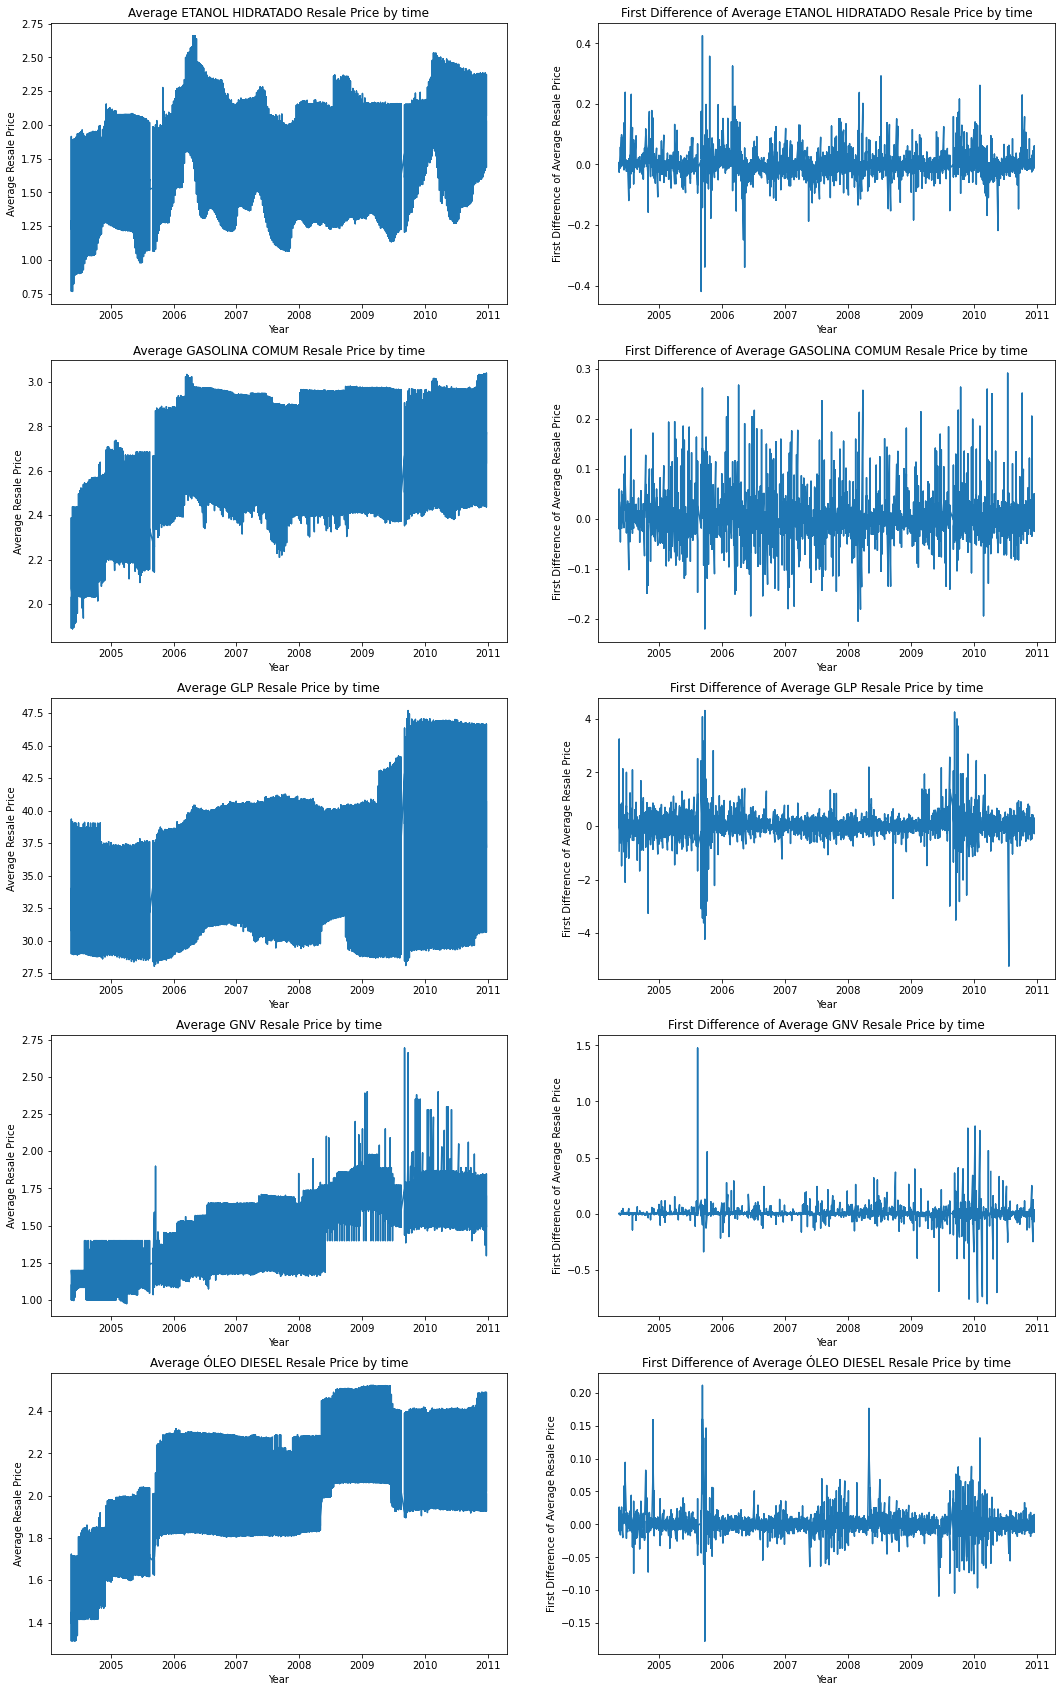

In [8]:
data_train['diff_Mean_Price'] = data_train.groupby(['Product', 'State'])['Mean_Price'].apply(lambda row: row.diff().shift(-1))


plt.figure(figsize=[18,30])
count = 0
rows = len(data_train['Product'].unique())

for prod in data_train['Product'].unique():
    count += 1
    plt.subplot(rows, 2, count)
    plt.plot('Last_Day_of_Analyses_of_Week', 'Mean_Price', data=data_train[data_train['Product'] == prod])
    plt.xlabel('Year')
    plt.ylabel('Average Resale Price')
    plt.title(f'Average {prod} Resale Price by time')
    
    count += 1
    plt.subplot(rows, 2, count)
    plt.plot('Last_Day_of_Analyses_of_Week', 'diff_Mean_Price', data=data_train[data_train['Product'] == prod])
    plt.xlabel('Year')
    plt.ylabel('First Difference of Average Resale Price')
    plt.title(f'First Difference of Average {prod} Resale Price by time')
    
plt.show()

#### In the first column we can see that the average resale price for each product is not stationary, but after the first difference (second column) this difficulty is controlled and makes future analyses simpler